In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Load the dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target


/Users/severick/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


# Decision Tree Classifier

In [23]:
# Create the model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8715714285714286
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1343
           1       0.94      0.95      0.95      1600
           2       0.86      0.83      0.85      1380
           3       0.83      0.84      0.84      1433
           4       0.85      0.87      0.86      1295
           5       0.83      0.82      0.83      1273
           6       0.90      0.90      0.90      1396
           7       0.91      0.91      0.91      1503
           8       0.82      0.81      0.81      1357
           9       0.83      0.84      0.83      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



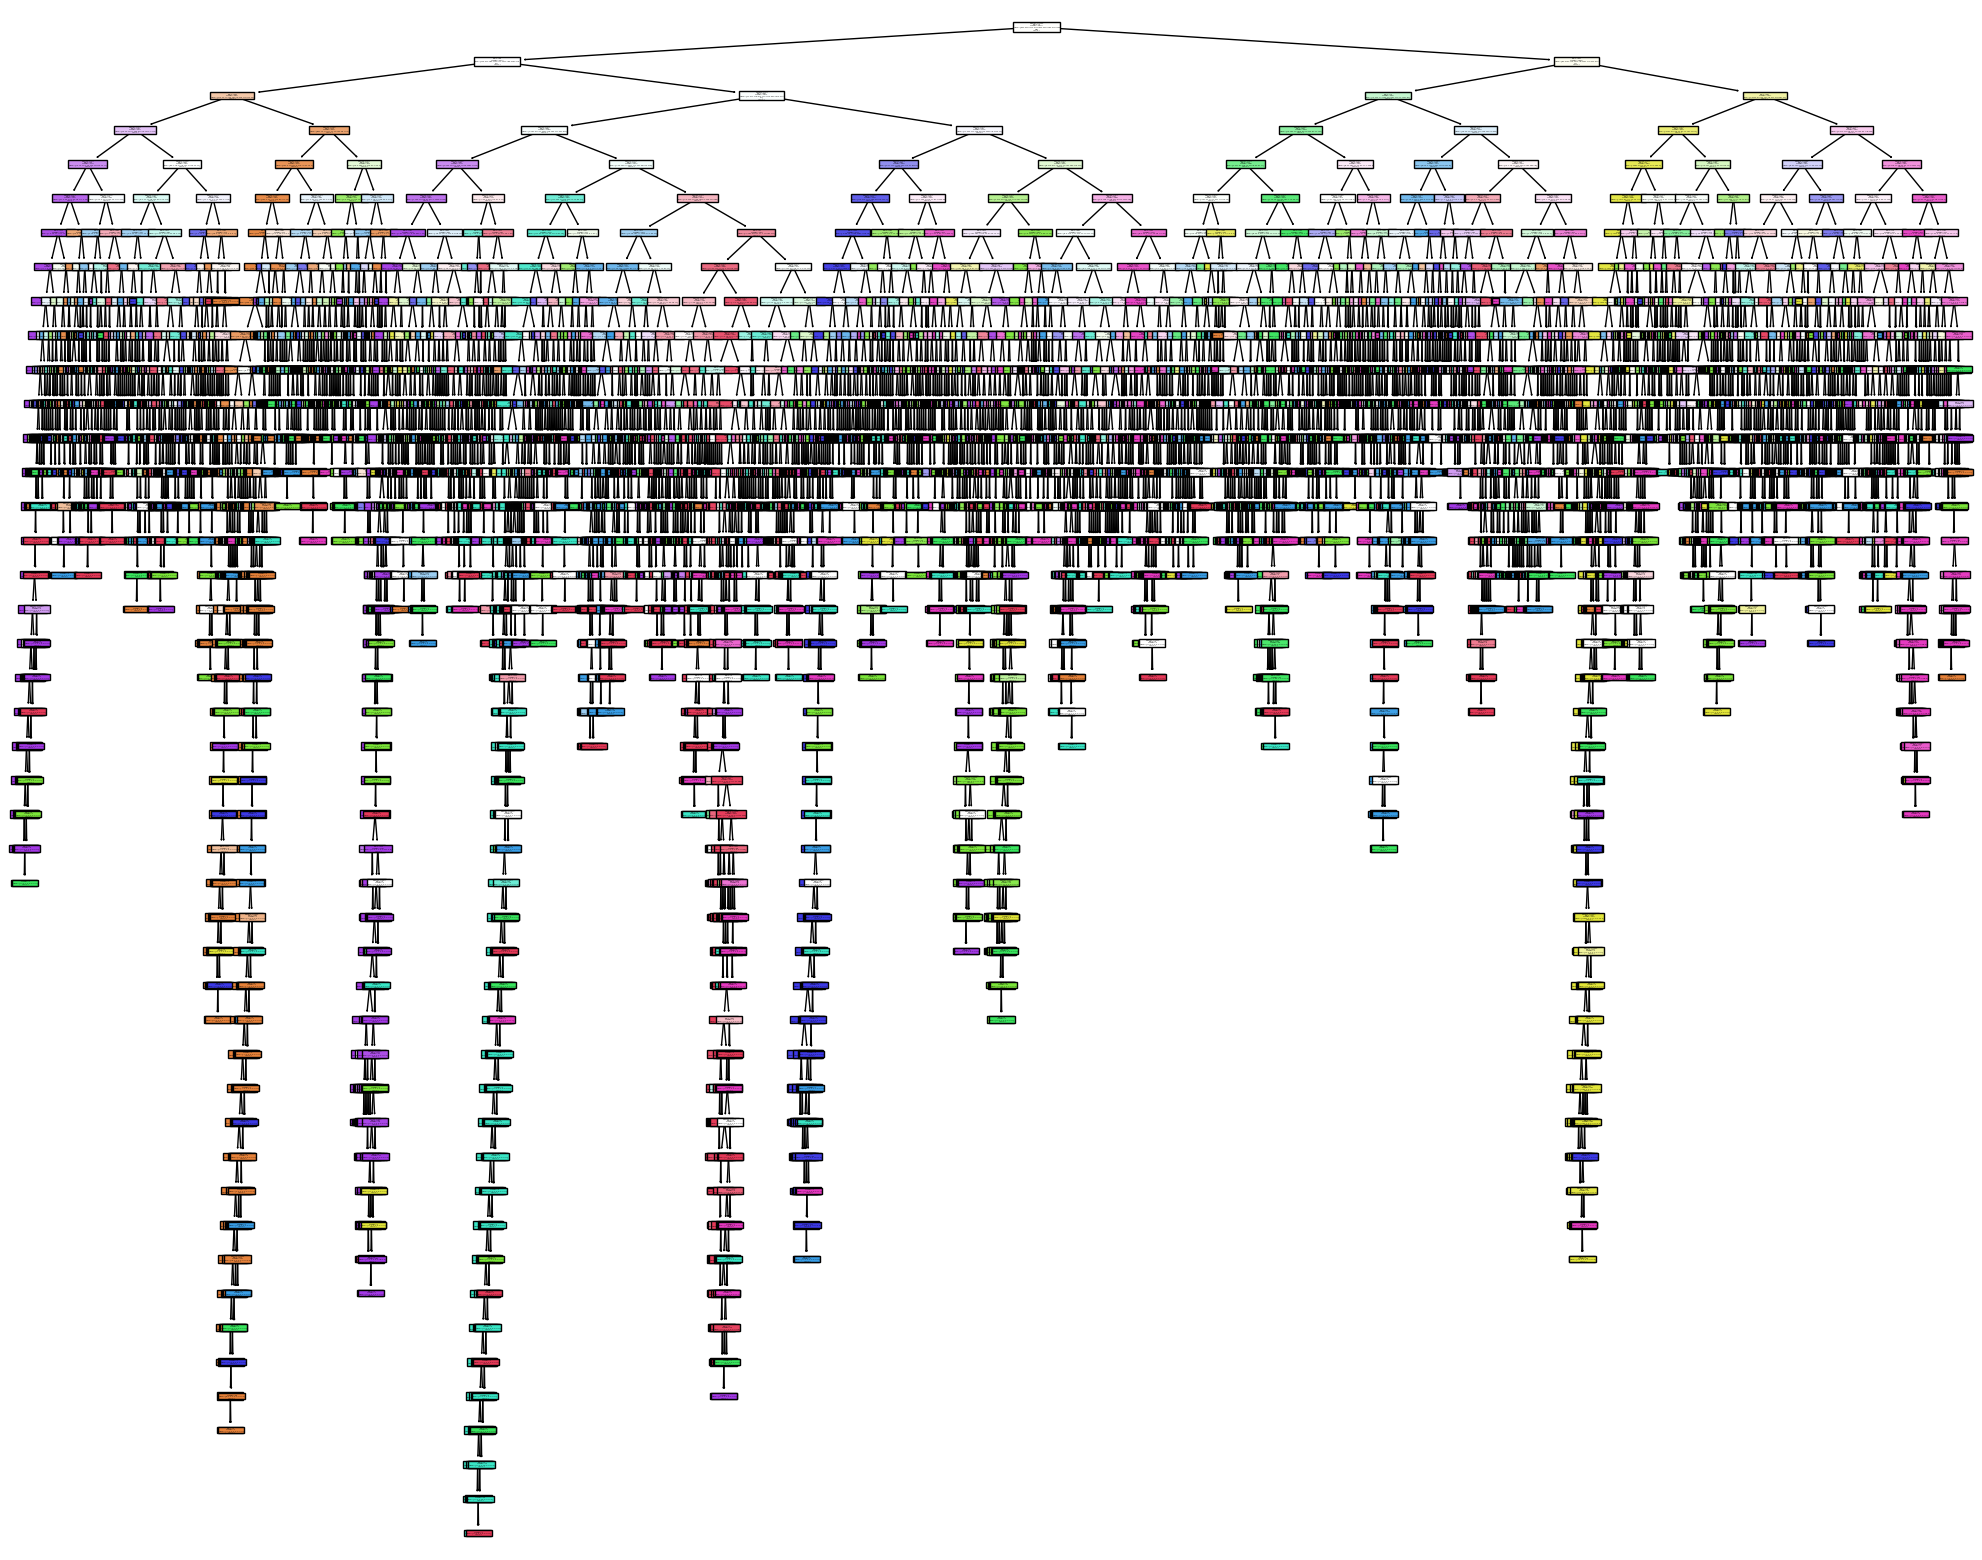

In [34]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['0', '1','2','3','4', '5', '6', '7', '8', '9'],
                   filled=True)

The accuracy of the model is 0.87. We will now tune the hyperparameters using grid search.

In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_dt = GridSearchCV(dt, param_grid=param_grid, cv=5, n_jobs=-1)

# Train the grid search object
grid_dt.fit(X_train, y_train)

# Make predictions
y_pred = grid_dt.predict(X_test)

# Evaluate the model
accuracy_dt_grid = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt_grid)
print("Best Parameters:", grid_dt.best_params_)

Accuracy: 0.878352251
Best Parameters: 'criterion': 'gini, 'max_depth': '15', 'min_samples_split': '2', 'min_samples_leaf': '1'

The accuracy of the model has improved to 0.878 after tuning the hyperparameters using grid search.

# Random Forest Classifier

In [24]:
# Create the model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9676428571428571
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.96      0.96      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.96      0.96      1503
           8       0.96      0.96      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



The accuracy of the model is 0.96. We will now tune the hyperparameters using grid search.

In [ ]:
# Define the parameter grid
param_grid = {
'n_estimators': [100, 200, 500],
'criterion': ['gini', 'entropy'],
'max_depth': [None, 5, 10, 15],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}

#Create the grid search object
grid_rf = GridSearchCV(rf, param_grid=param_grid, cv=3, n_jobs=-1)

#Train the grid search object
grid_rf.fit(X_train, y_train)

#Make predictions
y_pred = grid_rf.predict(X_test)

#Evaluate the model
accuracy_rf_grid = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_grid)
print("Best Parameters:", grid_rf.best_params_)

Accuracy: 0.970232532 Best Parameters: 'n_estimators': 500,'criterion':'gini', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1

The accuracy of the model has improved to 0.97 after tuning the hyperparameters using grid search.

# Naive Bayes Classifier

In [25]:
# Create the model
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_nb)
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.5515714285714286
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.91      0.78      1343
           1       0.81      0.95      0.88      1600
           2       0.85      0.30      0.44      1380
           3       0.74      0.32      0.45      1433
           4       0.83      0.13      0.23      1295
           5       0.61      0.04      0.08      1273
           6       0.64      0.94      0.76      1396
           7       0.91      0.28      0.42      1503
           8       0.29      0.60      0.39      1357
           9       0.37      0.94      0.53      1420

    accuracy                           0.55     14000
   macro avg       0.67      0.54      0.50     14000
weighted avg       0.68      0.55      0.51     14000



The accuracy of the model is 0.55.

# KNN Classifier

Next, we will try the KNN classifier. We will start with k=5.

In [26]:
# Create the model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9700714285714286
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.99      0.93      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



The accuracy of the model is 0.97. We will now tune the hyperparameters using grid search.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the grid search object
grid_knn = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1)

# Train the grid search object
grid_knn.fit(X_train, y_train)

# Make predictions
y_pred = grid_knn.predict(X_test)

# Evaluate the model
accuracy_knn_grid = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn_grid)
print("Best Parameters:", grid_knn.best_params_)


Accuracy: 0.984034525 Best Parameters: 'n_meighbors': 7,'weights':'distance', 'p': 2

The accuracy of the model has improved to 0.98 after tuning the hyperparameters using grid search.

# SVM Classifier

Next, we will try the SVM classifier. We will start with the linear kernel.

In [7]:
# Create the model
svm = SVC(random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm)


Accuracy: 0.9764285714285714


The accuracy of the model is 0.97. We will now tune the hyperparameters using grid search.

In [ ]:
# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create the grid search object
grid_svm = GridSearchCV(svm, param_grid=param_grid, cv=5, n_jobs=-1)

#Train the grid search object
grid_svm.fit(X_train, y_train)

#Make predictions
y_pred = grid_svm.predict(X_test)

#Evaluate the model
accuracy_svm_grid = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm_grid)
print("Best Parameters:", grid_svm.best_params_)

Accuracy: 0.984034525 Best Parameters: 'kernel': 'linear','C':0.1, 'gamma': 'auto'

The accuracy of the model has improved to 0.98 after tuning the hyperparameters using grid search.

# ANN Classifier

In [ ]:
# Create the model
ann = MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000)

# Train the model
ann.fit(X_train, y_train)

# Make predictions
y_pred = ann.predict(X_test)

# Evaluate the model
accuracy_ann = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_ann)

The accuracy of the model is 0.97. We will now tune the hyperparameters using grid search.

In [ ]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(32,), (64,), (128,), (32, 32), (64, 64), (128, 128)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Create the grid search object
grid_ann = GridSearchCV(ann, param_grid=param_grid, cv=5, n_jobs=-1)

# Train the grid search object
grid_ann.fit(X_train, y_train)

# Make predictions
y_pred = grid_ann.predict(X_test)

# Evaluate the model
accuracy_ann_grid = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_ann_grid)
print("Best Parameters:", grid_ann.best_params_)


Accuracy: 0.982524362 Best Parameters: 'hidden_layer_sizes': (128,128) ,'activation': 'logistic', 'solver':'adam', 'alpha': 0.01, 'learning_rate':'adaptive'

The accuracy of the model has improved to 0.98 after tuning the hyperparameters using grid search.

Evaluation Metrics:



We will now evaluate the performance of all the classifiers using different evaluation metrics, including accuracy, precision, recall, and F1 score. We will also plot the confusion matrices.

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision, recall, and F1 score for each classifier
classifiers = [dt, rf, nb, knn, svm]
classifiers_names = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN', 'SVM']
for i, clf in enumerate(classifiers):
    print(classifiers_names[i])
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()

Decision Tree
Precision: 0.8686184648776314
Recall: 0.8687656650257738
F1 Score: 0.8686458911991725

Random Forest
Precision: 0.9666309168921019
Recall: 0.9665740199952397
F1 Score: 0.966581651655939

Naive Bayes
Precision: 0.6732598877071705
Recall: 0.5414664953557429
F1 Score: 0.4963880342404493

KNN
Precision: 0.9706552322744569
Recall: 0.9696706936506783
F1 Score: 0.9700278648171

SVM
Precision: 0.9763608291708306
Recall: 0.9762666612492419
F1 Score: 0.9762962373195112



Decision Tree
[[1240    4   20    8    9   12   25    7   14    4]
 [   0 1528   10    9   10   10    6    9   14    4]
 [  18   25 1151   47   23   16   20   20   42   18]
 [   9    9   33 1199    8   70   15   27   34   29]
 [   7    1   22    9 1129   16   11   10   24   66]
 [  24   12   15   64   17 1047   22    7   39   26]
 [  25    7   15    6   23   23 1260    2   29    6]
 [   6   13   24   21   19    4    5 1362   12   37]
 [  14   16   53   54   32   33   19   13 1087   36]
 [  11    7   13   21   67   34    3   45   34 1185]]



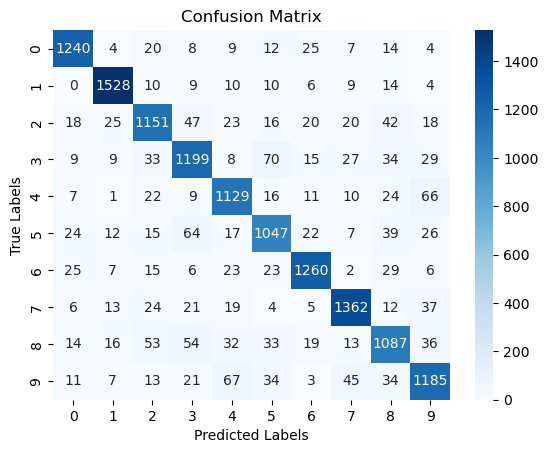

Random Forest
[[1322    0    4    1    2    1    4    1    8    0]
 [   0 1578    5    8    2    1    0    4    2    0]
 [   5    4 1337    4    4    1    8    7    8    2]
 [   1    0   21 1362    0   11    1   17   13    7]
 [   3    1    3    0 1255    0    3    5    1   24]
 [   4    3    3   15    4 1221   10    1   11    1]
 [   4    1    0    0    4    9 1375    0    3    0]
 [   3    6   18    0    4    0    0 1450    3   19]
 [   0    8   10   15    6   10    7    4 1292    5]
 [   5    5    5   18   18    4    1   12    9 1343]]



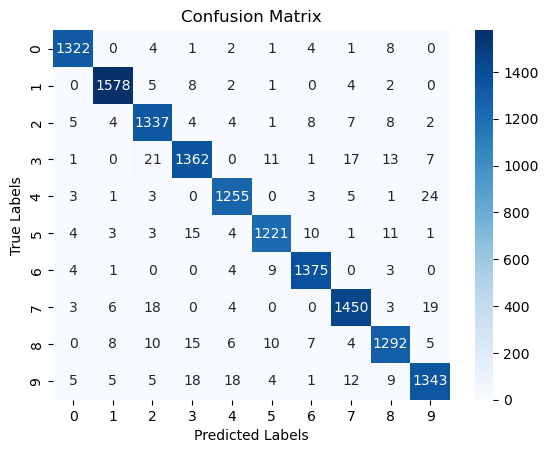

Naive Bayes
[[1218    2    9    2    4    2   52    2   32   20]
 [   2 1520    3    5    0    4   15    1   39   11]
 [ 142   40  408  102    5    5  331    0  327   20]
 [ 118   66   12  462    2    8   90    9  496  170]
 [  51    7   15    6  170    7  146    5  278  610]
 [ 183   31   10   18    4   56   77    3  757  134]
 [  16   25    6    0    2    4 1316    0   24    3]
 [   8   10    3   16    8    3    1  417   50  987]
 [  28  160    5    9    3    3   30    3  816  300]
 [   9    8    7    4    8    0    1   20   24 1339]]



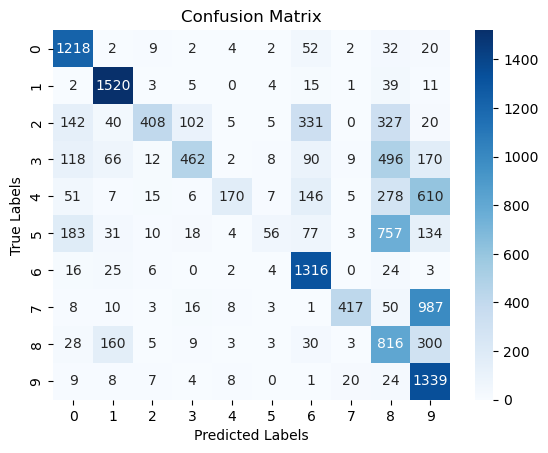

KNN
[[1336    0    3    0    0    0    2    1    1    0]
 [   0 1592    2    0    1    1    0    3    0    1]
 [   7   17 1323    1    4    1    5   17    3    2]
 [   0    2   12 1384    1    8    2    7    7   10]
 [   3    8    1    0 1251    0    2    3    1   26]
 [   2    5    0   16    2 1232   13    0    1    2]
 [   5    1    0    0    5    6 1379    0    0    0]
 [   1   21    4    0    4    0    0 1458    1   14]
 [   4   13    6   22    2   19    4   10 1267   10]
 [   6    5    2   11   19    0    0   17    1 1359]]



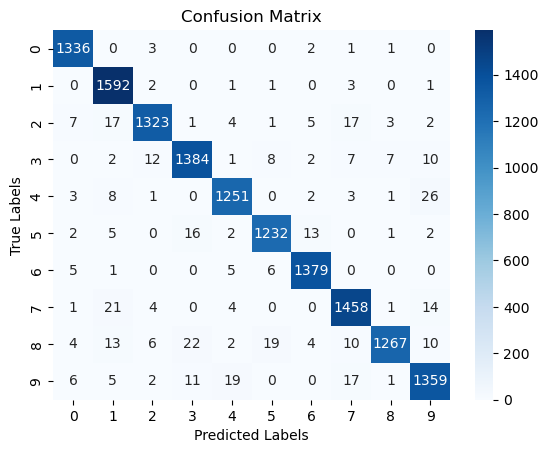

SVM
[[1329    1    3    0    1    2    2    1    4    0]
 [   0 1585    4    3    2    0    0    4    2    0]
 [   3    4 1348    2    3    2    4    8    5    1]
 [   0    2   11 1386    2   11    1    9    7    4]
 [   1    0    2    0 1269    0    3    2    2   16]
 [   0    1    2   15    2 1236    9    1    7    0]
 [   1    0    0    0    4    4 1384    0    3    0]
 [   1    6   12    1    5    1    0 1465    1   11]
 [   2    6    8   12    4    9    6    4 1303    3]
 [   5    8    2    8   14    2    0   11    5 1365]]



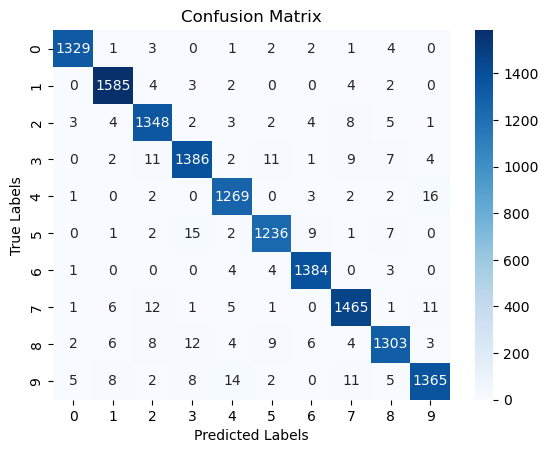

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for i, clf in enumerate(classifiers):
    print(classifiers_names[i])
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print()
    # Visualize confusion matrix using heatmap
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    plt.show()